In [74]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from math import *
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn import linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import scipy.stats as ss

data = pd.read_json('data.json')
data

data.isnull().sum()

data.drop_duplicates(keep = 'first')

counts = data[[0, 2]].groupby(2).count()
counts

Features = np.array(data[[0, 1]])
labels = np.array(data[2])

nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 1500)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

def scale(cols):
    for i in range(cols.shape[1]):
        col = cols[:, i]
        m = col.mean()
        s = col.std()
        for j in range(col.shape[0]):
            cols[j, i] = (cols[j, i] -m)/s 

scale(x_train[: ,:])
scale(x_test[: ,:])



In [75]:
x = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis = 1)
theta = np.ones([x.shape[1],1])
y = y_train.reshape(x_train.shape[0],1)
x_t = x_test
x_test = np.concatenate([np.ones((x_test.shape[0], 1)), x_test], axis = 1)

In [76]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def net_input(x, theta):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(x, theta))

(net_input(x, theta)-y).shape

(4500, 1)

In [77]:
 # Computes the cost function for all the training samples
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = (-1/m)*(np.sum(y*np.log(probability(theta, x)) + (1-y)*(np.log(1-probability(theta, x)))))
    return total_cost

# Computes the gradient of the cost function at the point theta
def gradient(theta, x, y):
    m = x.shape[0]
    return (1/m)*(np.dot(np.transpose(x), sigmoid(net_input(x, theta))-y))

gradient(theta, x, y).shape

(3, 1)

In [78]:
alpha = 0.001
num_iters = 400
m = x_train.shape[0]
for i in range(num_iters):
    theta = theta - (alpha/m)*(gradient(theta,x,y))

In [79]:
theta.shape


(3, 1)

In [80]:
theta

array([[1.00000973],
       [0.99998729],
       [0.99998536]])

In [81]:
cost_function(theta, x, y)

0.6856727539348229

In [83]:
probs = probability(theta, x_test)
probs.shape

(1500, 1)

In [84]:
threshold = 0.5
prediction = np.array([1 if x>threshold else 0 for x in probs])
prediction

array([1, 0, 0, ..., 1, 1, 0])

In [85]:
y_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [86]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels,scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print(f'Accuracy {sklm.accuracy_score(labels,scores):.2f}')
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
    
    
print_metrics(y_test, prediction)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       104               235
Actual negative       278               883

Accuracy 0.66
 
           Positive      Negative
Num case      339          1161
Precision    0.27          0.79
Recall       0.31          0.76
F1           0.29          0.77


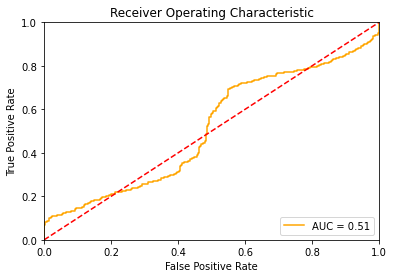

In [87]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs)
    auc = sklm.auc(fpr, tpr)
     
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs)